In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [3]:
df=pd.read_csv('cancer_classification.csv')

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

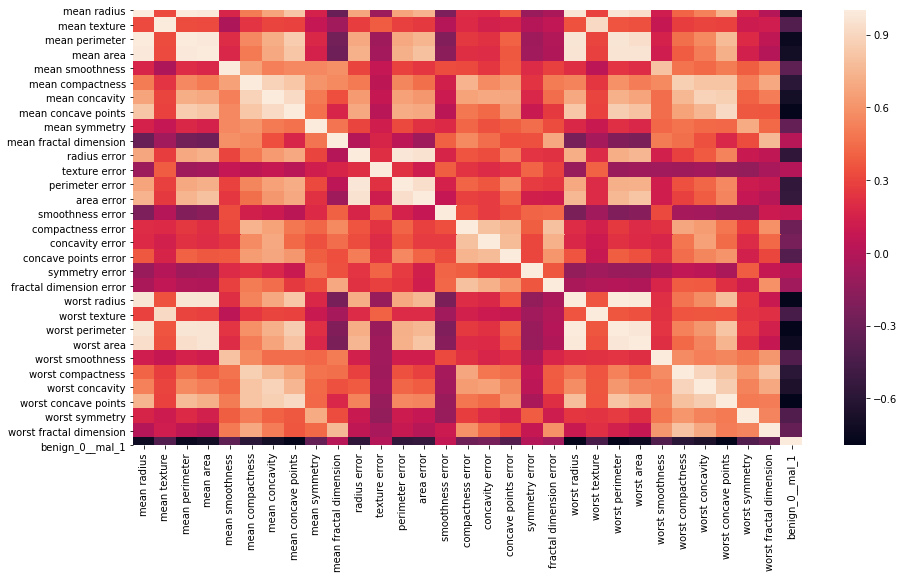

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr())

In [8]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

In [9]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [16]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [41]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))




model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')


ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [19]:
model.fit(X_train,y_train,epochs=400,validation_data=(X_test,y_test),verbose=1)

Train on 426 samples, validate on 143 samples
Epoch 1/400
426/426 [==============================] - 0s 1ms/sample - loss: 0.6664 - val_loss: 0.6383
Epoch 2/400
426/426 [==============================] - 0s 110us/sample - loss: 0.6162 - val_loss: 0.5959
Epoch 3/400
426/426 [==============================] - 0s 103us/sample - loss: 0.5765 - val_loss: 0.5595
Epoch 4/400
426/426 [==============================] - 0s 110us/sample - loss: 0.5391 - val_loss: 0.5201
Epoch 5/400
426/426 [==============================] - 0s 100us/sample - loss: 0.4981 - val_loss: 0.4769
Epoch 6/400
426/426 [==============================] - 0s 98us/sample - loss: 0.4526 - val_loss: 0.4285
Epoch 7/400
426/426 [==============================] - 0s 93us/sample - loss: 0.4066 - val_loss: 0.3787
Epoch 8/400
426/426 [==============================] - 0s 114us/sample - loss: 0.3616 - val_loss: 0.3335
Epoch 9/400
426/426 [==============================] - 0s 98us/sample - loss: 0.3210 - val_loss: 0.2963
Epoch 10/400
4

426/426 [==============================] - 0s 116us/sample - loss: 0.0511 - val_loss: 0.1008
Epoch 79/400
426/426 [==============================] - 0s 96us/sample - loss: 0.0520 - val_loss: 0.0963
Epoch 80/400
426/426 [==============================] - 0s 97us/sample - loss: 0.0545 - val_loss: 0.1032
Epoch 81/400
426/426 [==============================] - 0s 85us/sample - loss: 0.0513 - val_loss: 0.1004
Epoch 82/400
426/426 [==============================] - 0s 104us/sample - loss: 0.0495 - val_loss: 0.0969
Epoch 83/400
426/426 [==============================] - 0s 104us/sample - loss: 0.0483 - val_loss: 0.0999
Epoch 84/400
426/426 [==============================] - 0s 99us/sample - loss: 0.0489 - val_loss: 0.0995
Epoch 85/400
426/426 [==============================] - 0s 113us/sample - loss: 0.0480 - val_loss: 0.1003
Epoch 86/400
426/426 [==============================] - 0s 105us/sample - loss: 0.0500 - val_loss: 0.0966
Epoch 87/400
426/426 [==============================] - 0s 81us

426/426 [==============================] - 0s 103us/sample - loss: 0.0350 - val_loss: 0.1107
Epoch 156/400
426/426 [==============================] - 0s 114us/sample - loss: 0.0362 - val_loss: 0.1046
Epoch 157/400
426/426 [==============================] - 0s 101us/sample - loss: 0.0362 - val_loss: 0.1113
Epoch 158/400
426/426 [==============================] - 0s 139us/sample - loss: 0.0340 - val_loss: 0.1092
Epoch 159/400
426/426 [==============================] - 0s 111us/sample - loss: 0.0339 - val_loss: 0.1094
Epoch 160/400
426/426 [==============================] - 0s 103us/sample - loss: 0.0337 - val_loss: 0.1070
Epoch 161/400
426/426 [==============================] - 0s 117us/sample - loss: 0.0340 - val_loss: 0.1064
Epoch 162/400
426/426 [==============================] - 0s 103us/sample - loss: 0.0347 - val_loss: 0.1139
Epoch 163/400
426/426 [==============================] - 0s 89us/sample - loss: 0.0347 - val_loss: 0.1098
Epoch 164/400
426/426 [=============================

Epoch 232/400
426/426 [==============================] - 0s 109us/sample - loss: 0.0252 - val_loss: 0.1138
Epoch 233/400
426/426 [==============================] - 0s 95us/sample - loss: 0.0264 - val_loss: 0.1224
Epoch 234/400
426/426 [==============================] - 0s 110us/sample - loss: 0.0266 - val_loss: 0.1059
Epoch 235/400
426/426 [==============================] - 0s 92us/sample - loss: 0.0259 - val_loss: 0.1168
Epoch 236/400
426/426 [==============================] - 0s 91us/sample - loss: 0.0264 - val_loss: 0.1118
Epoch 237/400
426/426 [==============================] - 0s 79us/sample - loss: 0.0253 - val_loss: 0.1162
Epoch 238/400
426/426 [==============================] - 0s 102us/sample - loss: 0.0257 - val_loss: 0.1071
Epoch 239/400
426/426 [==============================] - 0s 102us/sample - loss: 0.0251 - val_loss: 0.1176
Epoch 240/400
426/426 [==============================] - 0s 103us/sample - loss: 0.0241 - val_loss: 0.1167
Epoch 241/400
426/426 [==================

Epoch 309/400
426/426 [==============================] - 0s 97us/sample - loss: 0.0182 - val_loss: 0.1101
Epoch 310/400
426/426 [==============================] - 0s 112us/sample - loss: 0.0174 - val_loss: 0.1226
Epoch 311/400
426/426 [==============================] - 0s 107us/sample - loss: 0.0172 - val_loss: 0.1131
Epoch 312/400
426/426 [==============================] - 0s 97us/sample - loss: 0.0171 - val_loss: 0.1138
Epoch 313/400
426/426 [==============================] - 0s 104us/sample - loss: 0.0179 - val_loss: 0.1123
Epoch 314/400
426/426 [==============================] - 0s 98us/sample - loss: 0.0171 - val_loss: 0.1251
Epoch 315/400
426/426 [==============================] - 0s 96us/sample - loss: 0.0177 - val_loss: 0.1157
Epoch 316/400
426/426 [==============================] - 0s 96us/sample - loss: 0.0169 - val_loss: 0.1153
Epoch 317/400
426/426 [==============================] - 0s 93us/sample - loss: 0.0166 - val_loss: 0.1179
Epoch 318/400
426/426 [====================

Epoch 386/400
426/426 [==============================] - 0s 102us/sample - loss: 0.0122 - val_loss: 0.1325
Epoch 387/400
426/426 [==============================] - 0s 103us/sample - loss: 0.0129 - val_loss: 0.1437
Epoch 388/400
426/426 [==============================] - 0s 103us/sample - loss: 0.0148 - val_loss: 0.1214
Epoch 389/400
426/426 [==============================] - 0s 96us/sample - loss: 0.0125 - val_loss: 0.1363
Epoch 390/400
426/426 [==============================] - 0s 85us/sample - loss: 0.0136 - val_loss: 0.1518
Epoch 391/400
426/426 [==============================] - 0s 105us/sample - loss: 0.0158 - val_loss: 0.1212
Epoch 392/400
426/426 [==============================] - 0s 101us/sample - loss: 0.0108 - val_loss: 0.1429
Epoch 393/400
426/426 [==============================] - 0s 103us/sample - loss: 0.0128 - val_loss: 0.1420
Epoch 394/400
426/426 [==============================] - 0s 107us/sample - loss: 0.0126 - val_loss: 0.1243
Epoch 395/400
426/426 [================

In [20]:
losses=pd.DataFrame(model.history.history)

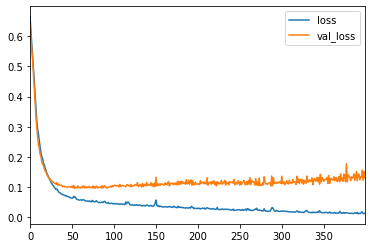

In [21]:
losses.plot()

In [33]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',patience=25,verbose=1)

In [34]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[es],verbose=1)

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.7006 - val_loss: 0.6751
Epoch 2/600
426/426 [==============================] - 0s 105us/sample - loss: 0.6615 - val_loss: 0.6467
Epoch 3/600
426/426 [==============================] - 0s 105us/sample - loss: 0.6259 - val_loss: 0.6035
Epoch 4/600
426/426 [==============================] - 0s 105us/sample - loss: 0.5896 - val_loss: 0.5677
Epoch 5/600
426/426 [==============================] - 0s 106us/sample - loss: 0.5516 - val_loss: 0.5285
Epoch 6/600
426/426 [==============================] - 0s 118us/sample - loss: 0.5120 - val_loss: 0.4841
Epoch 7/600
426/426 [==============================] - 0s 109us/sample - loss: 0.4676 - val_loss: 0.4373
Epoch 8/600
426/426 [==============================] - 0s 104us/sample - loss: 0.4236 - val_loss: 0.3898
Epoch 9/600
426/426 [==============================] - 0s 87us/sample - loss: 0.3790 - val_loss: 0.3433
Epoch 10/600

Epoch 78/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0528 - val_loss: 0.1009
Epoch 79/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0532 - val_loss: 0.0968
Epoch 80/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0542 - val_loss: 0.1041
Epoch 81/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0531 - val_loss: 0.1017
Epoch 00081: early stopping


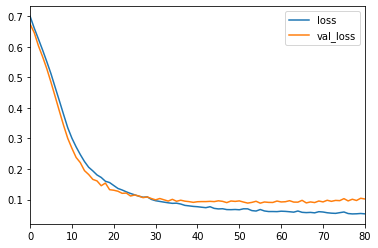

In [35]:
loss=pd.DataFrame(model.history.history)
loss.plot()

In [53]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [54]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',patience=25,verbose=1)

In [55]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[es],verbose=1) 

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.7091 - accuracy: 0.6455 - val_loss: 0.6522 - val_accuracy: 0.6643
Epoch 2/600
426/426 [==============================] - 0s 113us/sample - loss: 0.6576 - accuracy: 0.6620 - val_loss: 0.6263 - val_accuracy: 0.8462
Epoch 3/600
426/426 [==============================] - 0s 122us/sample - loss: 0.6512 - accuracy: 0.6714 - val_loss: 0.6053 - val_accuracy: 0.8881
Epoch 4/600
426/426 [==============================] - 0s 116us/sample - loss: 0.6218 - accuracy: 0.6831 - val_loss: 0.5873 - val_accuracy: 0.8811
Epoch 5/600
426/426 [==============================] - 0s 116us/sample - loss: 0.5974 - accuracy: 0.7418 - val_loss: 0.5642 - val_accuracy: 0.8671
Epoch 6/600
426/426 [==============================] - 0s 129us/sample - loss: 0.5745 - accuracy: 0.7254 - val_loss: 0.5432 - val_accuracy: 0.8741
Epoch 7/600
426/426 [==============================] - 0s 136us/sample - l

426/426 [==============================] - 0s 133us/sample - loss: 0.1557 - accuracy: 0.9648 - val_loss: 0.0955 - val_accuracy: 0.9790
Epoch 57/600
426/426 [==============================] - 0s 118us/sample - loss: 0.1539 - accuracy: 0.9413 - val_loss: 0.0984 - val_accuracy: 0.9720
Epoch 58/600
426/426 [==============================] - 0s 109us/sample - loss: 0.1596 - accuracy: 0.9390 - val_loss: 0.0982 - val_accuracy: 0.9720
Epoch 59/600
426/426 [==============================] - 0s 124us/sample - loss: 0.1434 - accuracy: 0.9484 - val_loss: 0.0952 - val_accuracy: 0.9790
Epoch 60/600
426/426 [==============================] - 0s 171us/sample - loss: 0.1488 - accuracy: 0.9413 - val_loss: 0.1075 - val_accuracy: 0.9580
Epoch 61/600
426/426 [==============================] - 0s 154us/sample - loss: 0.1450 - accuracy: 0.9437 - val_loss: 0.1023 - val_accuracy: 0.9580
Epoch 62/600
426/426 [==============================] - 0s 102us/sample - loss: 0.1154 - accuracy: 0.9624 - val_loss: 0.0923 

426/426 [==============================] - 0s 134us/sample - loss: 0.0967 - accuracy: 0.9648 - val_loss: 0.0856 - val_accuracy: 0.9860
Epoch 112/600
426/426 [==============================] - 0s 118us/sample - loss: 0.1059 - accuracy: 0.9648 - val_loss: 0.0867 - val_accuracy: 0.9860
Epoch 113/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0872 - accuracy: 0.9789 - val_loss: 0.0994 - val_accuracy: 0.9650
Epoch 114/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0833 - accuracy: 0.9742 - val_loss: 0.0944 - val_accuracy: 0.9790
Epoch 115/600
426/426 [==============================] - 0s 154us/sample - loss: 0.0900 - accuracy: 0.9648 - val_loss: 0.0928 - val_accuracy: 0.9790
Epoch 116/600
426/426 [==============================] - 0s 171us/sample - loss: 0.0789 - accuracy: 0.9742 - val_loss: 0.0835 - val_accuracy: 0.9790
Epoch 117/600
426/426 [==============================] - 0s 177us/sample - loss: 0.0791 - accuracy: 0.9695 - val_loss: 0

In [56]:
model.evaluate(X_test,y_test)

143/143 [==============================] - 0s 66us/sample - loss: 0.0852 - accuracy: 0.9790


[0.08520956690442728, 0.97902095]

In [57]:
loses=pd.DataFrame(model.history.history)

<Figure size 1080x432 with 0 Axes>

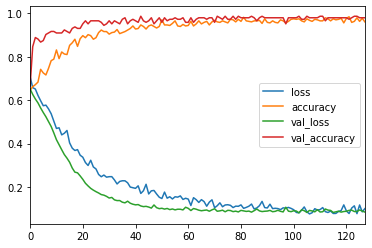

In [60]:
plt.figure(figsize=(15,6))
loses.plot()

In [48]:
predictions=model.predict_classes(X_test)

In [50]:
from sklearn import metrics

In [51]:
metrics.confusion_matrix(y_test,predictions)

array([[54,  1],
       [ 2, 86]])

In [52]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

